## Quantum Networking

Quantum networking, a rapidly evolving field, represents the future of secure communication, distributed computing, and advanced sensing. By leveraging the principles of quantum mechanics, quantum networks can transmit information in ways that are fundamentally more secure than classical networks. One of the key components of quantum networking is quantum entanglement, a phenomenon where particles become interconnected in such a way that the state of one instantly influences the state of another, regardless of distance. This property forms the basis of quantum teleportation, a method of transferring quantum information between distant locations without physically moving the particles themselves.

The fundamental unit of quantum information is the qubit, and in a quantum network, qubits are transmitted between nodes via quantum channels, often through optical fibers or free-space communication. Quantum repeaters are employed to extend the range of these networks, overcoming the limitations of signal loss over long distances. These repeaters work by creating and purifying entanglement across segments of the network, effectively allowing entanglement to be extended across thousands of kilometers.

Applications of quantum networking are diverse and impactful. One of the most prominent is quantum key distribution (QKD), which allows two parties to share encryption keys with unconditional security. Unlike classical encryption methods, which can be compromised by advances in computational power, QKD remains secure because any attempt at eavesdropping on the key exchange introduces detectable disturbances. This makes quantum networks ideal for applications requiring high levels of security, such as military communications, financial transactions, and critical infrastructure management.

Beyond secure communication, quantum networks have the potential to revolutionize distributed quantum computing. By linking multiple quantum processors over a network, it becomes possible to solve problems that are intractable for classical computers. This distributed approach could lead to breakthroughs in areas like material science, drug discovery, and complex optimization problems, where quantum algorithms have shown significant promise.

In the realm of sensing, quantum networks can enhance precision in measurements by exploiting quantum correlations between entangled particles. For instance, quantum-enhanced sensors can achieve unprecedented accuracy in detecting gravitational waves, magnetic fields, or even subtle changes in biological systems, opening up new possibilities for scientific discovery and medical diagnostics.

Looking ahead, the future of quantum networking holds exciting possibilities. Researchers are working on overcoming current technical challenges, such as reducing decoherence (the loss of quantum information due to environmental noise) and improving the efficiency of quantum repeaters. The development of fault-tolerant quantum communication protocols is also a critical area of focus, ensuring that quantum networks remain robust even in the presence of errors.

In conclusion, quantum networking represents a transformative technology with the potential to redefine secure communication, distributed computing, and advanced sensing. As the field progresses, we can anticipate a future where quantum networks become an integral part of the global communication infrastructure, enabling applications that are currently beyond the reach of classical technology. The ongoing research and development in quantum networking promise to bring us closer to realizing the full potential of quantum information science.

### Quantum Teleportation Formulas

#### Initial Quantum State:
$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$

#### Bell State Preparation:
$$
|\text{Bell}\rangle = \frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)
$$

#### Combined System State:
$$
|\psi\rangle \otimes |\text{Bell}\rangle = \frac{1}{\sqrt{2}} \left( \alpha|0\rangle \otimes (|00\rangle + |11\rangle) + \beta|1\rangle \otimes (|00\rangle + |11\rangle) \right)
$$

#### State after CNOT and Hadamard:
$$
\frac{1}{2} \left( |00\rangle(\alpha|0\rangle + \beta|1\rangle) + |01\rangle(\alpha|1\rangle + \beta|0\rangle) + |10\rangle(\alpha|0\rangle - \beta|1\rangle) + |11\rangle(\alpha|1\rangle - \beta|0\rangle) \right)
$$ 

#### Bob's Qubit State Based on Alice's Measurement: 
- $$|00\rangle: \alpha|0\rangle + \beta|1\rangle$$
- $$|01\rangle: \alpha|1\rangle + \beta|0\rangle$$
- $$|10\rangle: \alpha|0\rangle - \beta|1\rangle$$
- $$|11\rangle: \alpha|1\rangle - \beta|0\rangle$$



#### Final State After Correction:
$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$


In [1]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initialize a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

In [3]:
# Step 1: Create an entangled pair (EPR pair) between Alice's and Bob's qubits
qc.h(0)  # Apply Hadamard gate to qubit 0 (Alice)
qc.cx(0, 1)  # Entangle qubit 0 (Alice) with qubit 1 (Bob)

In [4]:
# Step 2: Teleport a quantum state from Alice (qubit 0) to Bob (qubit 1)
# Assume Alice prepares her qubit (qubit 2) in a state to teleport
qc.h(2)  # Apply Hadamard gate to qubit 2 (Alice's state to teleport)
qc.cx(2, 0)  # Apply CNOT with qubit 2 as control and qubit 0 as target
qc.h(2)  # Apply Hadamard to qubit 2 again

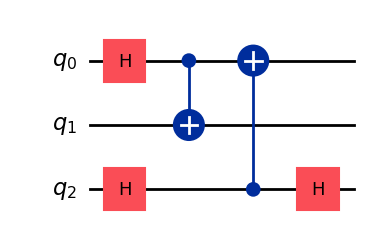

In [5]:
# Draw the circuit
qc.draw('mpl')
plt.show()

In [6]:
# Transpile and simulate the circuit before measurement to visualize the state
simulator = AerSimulator()
qc_sim = transpile(qc, simulator)
result = simulator.run(qc_sim).result()

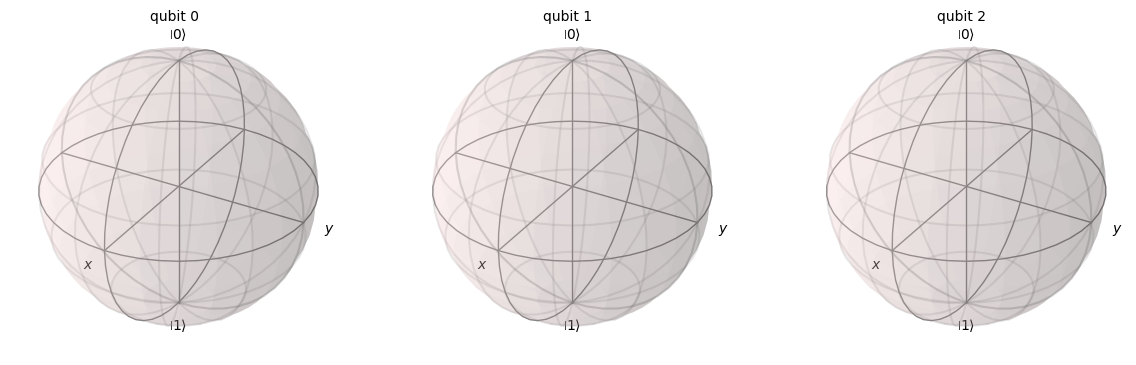

In [7]:
# Get the statevector before measurement and plot on Bloch spheres
statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)
plt.show()

In [8]:
# Step 3: Measure Alice's qubits
qc.measure_all()

In [9]:
# Step 4: Simulate the circuit after measurement and plot the results
qc_sim = transpile(qc, simulator)
qobj = assemble(qc_sim)
result = simulator.run(qobj).result()

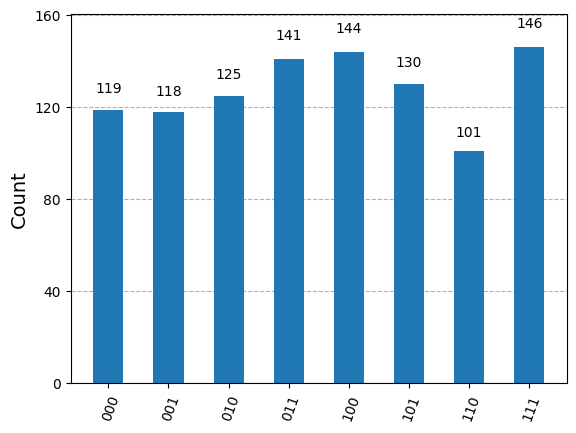

In [10]:
# Extract and plot the measurement results
counts = result.get_counts()
plot_histogram(counts)
plt.show()